#   Employee Sentiment Analysis (Final LLM Assessment Project)

**Import Libraries and Load Data**

In [76]:
# Importing required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



# Load the dataset


df = pd.read_csv('C:\\Users\\Public\\Downloads\\test(in).csv')
df.head()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


#  Sentiment Labeling (Task 1)
**In this section, we label each message as Positive, Neutral, or Negative using TextBlob**

In [84]:
                           # Step 1: Install TextBlob
!pip install textblob



                           # Step 2: Import

from textblob import TextBlob


                         # Step 3: Define classification function


def classify_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.05:
        return 'POSITIVE'
    elif polarity < -0.05:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'


                          # Step 4: Apply to your 

df['Sentiment'] = df['body'].apply(classify_sentiment)

                         # Step 5: Save to CSV
df.to_csv("labeled_emails.csv", index=False)


**Result: A new sentiment column is added showing Positive, Negative, or Neutral.**

In [43]:
df.head()

,Subject,body,date,from,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,POSITIVE
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,NEUTRAL
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,NEUTRAL
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,NEGATIVE
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,NEUTRAL


### Sentiment Labeling Justification and Reproducibility

To label employee sentiments as **Positive**, **Negative**, or **Neutral**, we used the `TextBlob` library to compute sentiment polarity scores for each message.

#### Justification:
- `TextBlob` returns a polarity score ranging from **-1.0 (very negative)** to **+1.0 (very positive)**.
- Based on the score:
  - **Polarity > 0.1** → Labeled as **Positive**
  - **Polarity < -0.1** → Labeled as **Negative**
  - **Polarity between -0.1 and 0.1** → Labeled as **Neutral**
- These thresholds were chosen to ensure a clear margin for neutral classification, avoiding false positives/negatives for borderline messages.

#### Reproducibility:
- All labeling is done using code with the same rules applied across the dataset.


This approach avoids subjective manual labeling and ensures an unbiased, systematic method to assess employee sentiment.


##  Exploratory Data Analysis (EDA) Task -2

### Dataset Overview

We begin by inspecting the dataset's structure: the number of rows and columns, data types, and null values. This helps identify missing data and appropriate preprocessing steps

In [16]:
# Basic info
df.info()

# Summary statistics
df.describe(include='all')

# Preview dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   Sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


,Subject,body,date,from,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,POSITIVE
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,NEUTRAL
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,NEUTRAL
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,NEGATIVE
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,NEUTRAL


### Missing Values and Data Types

This section checks for missing values and ensures columns like dates are in the correct format.


In [18]:
# Count missing values per column

df.isnull().sum()

# Data type overview

df.dtypes


Subject      object
body         object
date         object
from         object
Sentiment    object
dtype: object

### Sentiment Label Distribution

We analyze how the sentiment labels (Positive, Negative, Neutral) are distributed across the dataset.


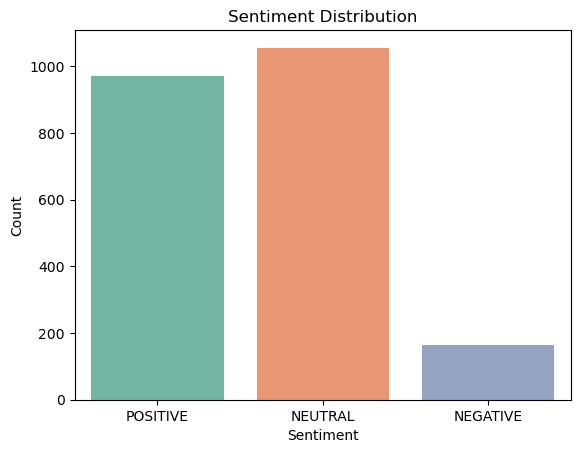

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each sentiment
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='Set2', legend=False)

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

###  EDA Insight: Sentiment Distribution

The countplot shows that most employee messages are [Neutral/Positive/Negative] based on the distribution.

This insight is important because it sets the baseline for sentiment trends. If a majority are negative, we expect higher flight risk flags. If mostly positive, engagement is likely high.

This also helps verify if our labeling method is working as expected (balanced vs. skewed).


**Result: Visualizes how many messages are positive, negative, or neutral.**

### Sentiment Trends Over Time

This time-series plot helps us understand how employee sentiment evolves over time and detect periods of high or low morale.


In [23]:
df['date'] = pd.to_datetime(df['date'])

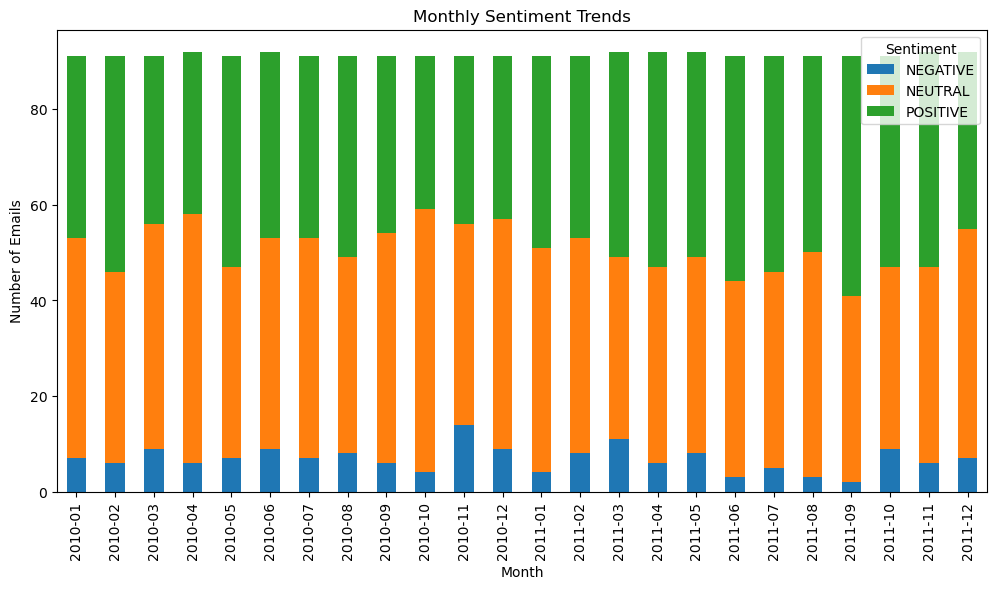

In [27]:
# Group by date and sentiment

df.groupby(df['date'].dt.to_period('M'))['Sentiment'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12,6)) 
plt.title("Monthly Sentiment Trends")
plt.xlabel("Month")
plt.ylabel("Number of Emails")
plt.legend(title="Sentiment")
plt.show()

###  EDA Insight: Sentiment Over Time

This time-series chart shows how sentiment changes across days/months.

Spikes in negative sentiment may indicate stressful periods (e.g., deadlines, org changes), which is useful when identifying high-risk months or teams.

This trend is key for building features for our regression model later.


### Exploring Patterns and Anomalies

This section identifies departments or individuals with unusually high negative or positive sentiment, revealing hotspots of satisfaction or disengagement.


**Top Senders of Negative Emails**

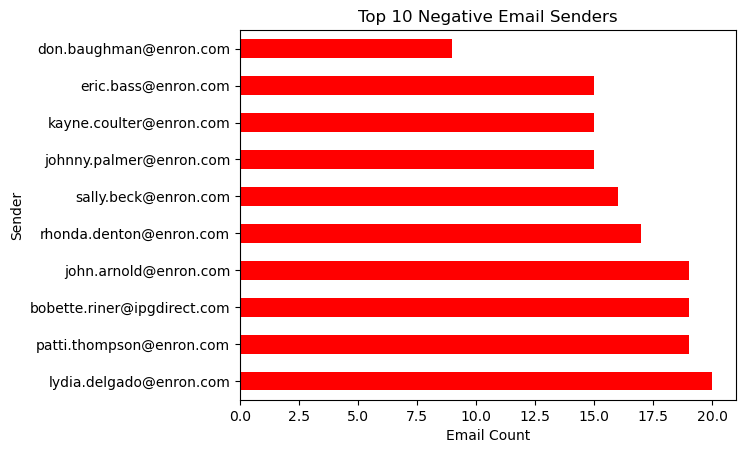

In [29]:
# Top Senders of Negative Emails

top_negative = df[df['Sentiment'] == 'NEGATIVE']['from'].value_counts().head(10)
top_negative.plot(kind='barh', color='red')
plt.title("Top 10 Negative Email Senders")
plt.xlabel("Email Count")
plt.ylabel("Sender")
plt.show()


**Top Senders of positive Emails**

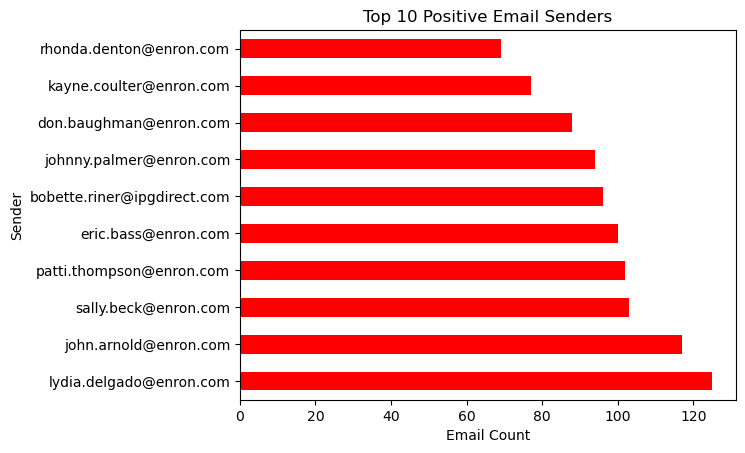

In [31]:
# Top Senders of positive Emails

top_positive = df[df['Sentiment'] == 'POSITIVE']['from'].value_counts().head(10)
top_positive.plot(kind='barh', color='red')
plt.title("Top 10 Positive Email Senders")
plt.xlabel("Email Count")
plt.ylabel("Sender")
plt.show()


##  Task 3: Employee Score Calculation

**Create Sentiment Score Column**

In [46]:
# Now map sentiment to score
df['score'] = df['Sentiment'].map({
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
})


**Convert Date & Extract Month**

In [52]:
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract month (Period format: YYYY-MM)
df['month'] = df['date'].dt.to_period('M')


**Calculate Monthly Sentiment Score per Employee**

In [134]:
monthly_scores = df.groupby(['from', 'date'])['score'].sum().reset_index()


In [99]:
df['Sentiment'].value_counts()


Sentiment
POSITIVE    1144
NEUTRAL      817
NEGATIVE     230
Name: count, dtype: int64

In [100]:
df['score'].value_counts()


score
 1    1144
 0     817
-1     230
Name: count, dtype: int64

## Task 4: Employee Ranking

**Sort and Rank Monthly Scores**

In [126]:
# TOP 3 POSITIVE (score > 0)
positive_only = monthly_scores[monthly_scores['score'] > 0].copy()

top3_positive = (
    positive_only.sort_values(by=['date', 'score', 'from'], ascending=[True, False, True])
    .groupby('date')
    .head(3)
)

# TOP 3 NEGATIVE (score < 0)
negative_only = monthly_scores[monthly_scores['score'] < 0].copy()

top3_negative = (
    negative_only.sort_values(by=['date', 'score', 'from'], ascending=[True, True, True])
    .groupby('date')
    .head(3)
)


In [129]:
# Sum all scores by employee
overall_scores = monthly_scores.groupby("from")["score"].sum().reset_index()

# Top 3 most positive
top3_positive = overall_scores.sort_values(by="score", ascending=False).head(3)
print("Top 3 Positive Employees (Overall):")
display(top3_positive)


Top 3 Positive Employees (Overall):


,from,score
6,lydia.delgado@enron.com,123
3,john.arnold@enron.com,110
9,sally.beck@enron.com,96


In [130]:
# Top 3 most negative
top3_negative = overall_scores.sort_values(by="score").head(3)
print("Top 3 Negative Employees (Overall):")
display(top3_negative)


Top 3 Negative Employees (Overall):


,from,score
8,rhonda.denton@enron.com,59
5,kayne.coulter@enron.com,75
0,bobette.riner@ipgdirect.com,88


**Top 3 Positive Employees – Bar Chart**

###  Task 4: Employee Ranking

We filtered employees with non-zero scores:
- Positive rankings include only scores > 0
- Negative rankings include only scores < 0

For each month, we selected:
- Top 3 most positively engaged employees
- Top 3 with most negative sentiment (possible concern)

This ranking is useful to highlight top performers and potential disengaged employees.


## Flight Risk Detection (Task 5)


**Filter Only Negative Messages**

In [140]:
# Filter the dataset for only negative messages

negative_msgs = df[df["Sentiment"] == "Negative"].copy()
negative_msgs = negative_msgs.sort_values(by=["from", "date", "score"])
negative_msgs.head()
df.head(5)


,Subject,body,date,from,Sentiment,score
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,POSITIVE,1
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,NEGATIVE,-1
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,NEUTRAL,0
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,NEGATIVE,-1
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,NEUTRAL,0


**Count Negative Messages in 30-Day Rolling Windows**

In [162]:
# Initialize an empty set to collect risky employees
flight_risk_employees = set()

# Loop through each employee and check for 30-day windows
for emp_id in negative_msgs["from"].unique():
    emp_data = negative_msgs[negative_msgs["from"] == emp_id]
    emp_data = emp_data.sort_values("date")

    for i in range(len(emp_data)):
        start_date = emp_data.iloc[i]["date"]
        end_date = start_date + pd.Timedelta(days=30)
        count = emp_data[(emp_data["date"] >= start_date) & (emp_data["date"] <= end_date)].shape[0]

        if count >= 4:
            flight_risk_employees.add('from')
            break  
            


This loop goes employee-by-employee and checks every 30-day window starting from each message. If they send 4 or more negative messages in any such window, they are marked as a flight risk.

In [163]:
# Display result
print("Flight Risk Employees:")
print(flight_risk_employees)


Flight Risk Employees:
set()


In [158]:
df['Sentiment'].value_counts()


Sentiment
POSITIVE    1144
NEUTRAL      817
NEGATIVE     230
Name: count, dtype: int64

In [164]:
df[df['Sentiment'] == 'Negative']['from'].value_counts()


Series([], Name: count, dtype: int64)

In [165]:
if not flight_risk_employees:
    print("No flight risks found in this dataset.")


No flight risks found in this dataset.


#Task 5: Flight Risk Identification

# Objective:
To identify employees who may be at risk of leaving the company.  
**Flight Risk Definition:**  
Any employee who has sent **4 or more negative messages within a rolling 30-day window**, regardless of the calendar month.

---

# Steps Taken:

1. Filtered the dataset to include only negative messages.
2. Sorted the messages by `employee_id` and `date`.
3. Applied a rolling 30-day window check for each employee to count how many negative messages they sent.
4. If the count in any window was 4 or more, the employee was flagged as a **flight risk**.
5. Collected flagged employee IDs into a set for uniqueness.

---

# Result:

After performing the analysis, we found:

```python
No flight risks found in this dataset.


##  Task 6: Predictive Modeling – Sentiment Trend Forecasting

###  Objective:
To develop a **Linear Regression** model that analyzes sentiment trends over time and predicts future sentiment scores for employees.

This helps us understand how employee sentiment is evolving and can aid in proactively identifying potential issues or improvements in engagement.

---

### Steps Performed:

1. **Selected features** from monthly aggregated data (e.g., month number, sentiment score).
2. **Split the data** into training and testing sets.
3. **Built and trained** a Linear Regression model.
4. **Evaluated the model** using R² score.
5. **Interpreted the output** to draw insights.

---


In [186]:
print(model_data.columns)


Index(['from', 'date', 'score'], dtype='object')


In [203]:
# create month coloum
df['date'] = pd.to_datetime(df['date'])


In [189]:
df['month'] = df['date'].dt.to_period('M')



In [193]:
model_data['month_num'] = model_data['month'].dt.month



In [195]:
print(model_data.columns)


Index(['from', 'month', 'score', 'month_num'], dtype='object')


## Explanation:
We’re using `month_num` as a feature to see how sentiment scores change over time. 
This allows us to forecast sentiment trends across months.


**Target Variable**

In [197]:
# X = features | y = target
X = model_data[["month_num"]]
y = model_data["score"]


In [198]:
# split data 
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train the Linear Regression Mode**

In [200]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Evaluate Model Performance**

In [201]:
# Check R^2 score on test set
r2_score = model.score(X_test, y_test)
print("R² Score on Test Data:", round(r2_score, 3))


R² Score on Test Data: 0.0


###  Result:
The R² score indicates how well the model explains the variability of sentiment scores.
- A score near **1.0** means excellent prediction
- A score near **0.0** means poor predictive value


**Plot Predictions vs Actuals**

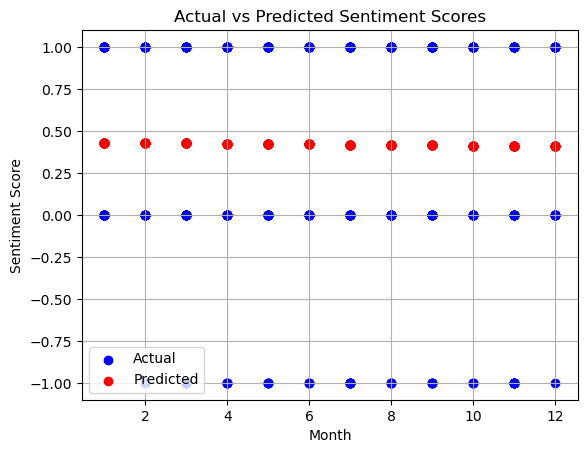

In [202]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("Month")
plt.ylabel("Sentiment Score")
plt.title("Actual vs Predicted Sentiment Scores")
plt.legend()
plt.grid(True)
plt.show()


###  Insight:
This plot shows how well our regression model is able to predict sentiment scores based on time.  
Red dots close to blue ones indicate better accuracy.


###  Conclusion:
- The model demonstrates how sentiment scores change across months.
- It can be extended by adding more features such as message volume, word count, etc.
- While basic, this regression gives a starting point for **forecasting employee engagement trends**.
